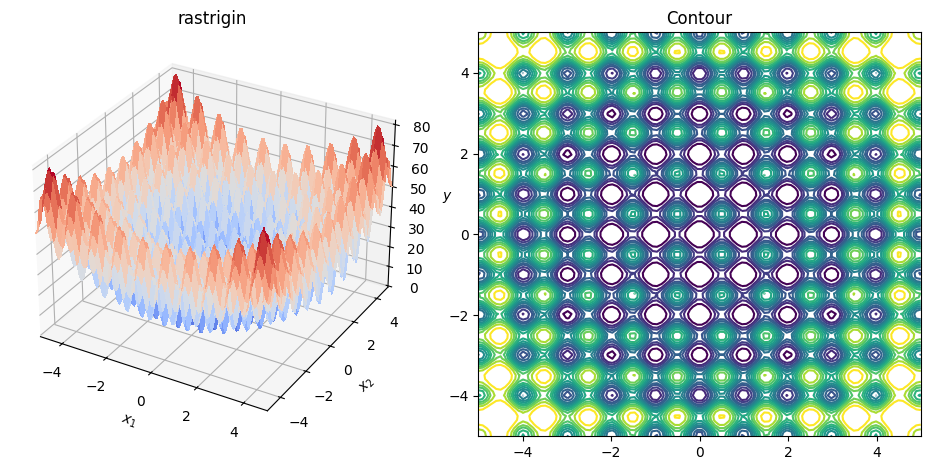

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

def sphere_fn(x):
    z = x
    return np.sum(np.square(z), axis=-1)

def rastrigin_fn (x):
    sum = np.array ([0])
    dim = x.shape[-1]
    
    for ii in range(dim):
        xi = x[ii]
        sum = sum + (xi**2 - 10*np.cos(2*np.pi*xi))
    
    return 10*dim + sum


def plot_fn(name, fn, traj=None,
            x_min=-5, x_max=5, num_levels=15, num_points_per_dim=100):
    x = np.linspace(x_min, x_max, num_points_per_dim)
    
    x1, x2 = np.meshgrid(x, x)
    x = np.stack([x1, x2]).reshape(2, -1).T
    y = np.array(list(map(rastrigin_fn, x))).T[0]
    y = y.reshape(num_points_per_dim, num_points_per_dim)

    fig = plt.figure(figsize=plt.figaspect(.5))

    # Plot the function.
    ax = fig.add_subplot(1, 2, 1, projection="3d")
    ax.plot_surface(x1, x2, y, cmap='coolwarm', linewidth=0, antialiased=False)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$y$")
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([x_min, x_max])
    ax.set_title(name.replace("_", " "))

    # Plot the contour.
    ax = fig.add_subplot(1, 2, 2)
    quantiles = (np.arange(num_levels + 2) / (num_levels + 1))[1:-1]
    ax.contour(x1, x2, y, np.quantile(y, quantiles))
    title = "Contour"
    if traj is not None:
        traj_len = traj.shape[0]
        alphas = np.linspace(0.1, 1, traj_len)
        for i in range(traj_len):
            ax.scatter(traj[i, 0], traj[i, 1],
                       color='black', marker="o", s=100, alpha=alphas[i])
        title += " & Optimization Trajectory"
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([x_min, x_max])
    ax.set_title(title)

    plt.tight_layout()


# === Main ===

fn_name = "rastrigin" 
plot_fn(fn_name, rastrigin_fn)